# Import Library

In [14]:
import pandas as pd

# Import Dataset

In [15]:
student_marks_df = pd.read_csv("../dataset/student_marks.csv")
student_marks_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


Deskripsi:
- Sumber: https://www.kaggle.com/yasserh/student-marks-dataset
- Jumlah observasi sebanyak 100.
- Jumlah attribute sebanyak 3, yaitu number_of_courses, time_study, dan marks.
- Fitur: number_of_courses dan time_study.
- Target: marks.
- Task: Regresi.

# Data Cleaning

## Rename Column

In [16]:
student_marks_df.rename(columns={"Marks": "marks"}, inplace=True)
student_marks_df.head()

,number_courses,time_study,marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


## Check Missing Value

In [17]:
student_marks_df.isna().sum()

number_courses    0
time_study        0
marks             0
dtype: int64

## Check Datatypes

In [18]:
student_marks_df.dtypes

number_courses      int64
time_study        float64
marks             float64
dtype: object

# Tipe Data

- Data Kualitatif:
    - Nominal: -
    - Ordinal: -
    
    
- Data Kuantitatif:
    - Interval: -
    - Ratio: number_of_courses, time_study, marks.

# Distribusi Frekuensi

## Number of Courses

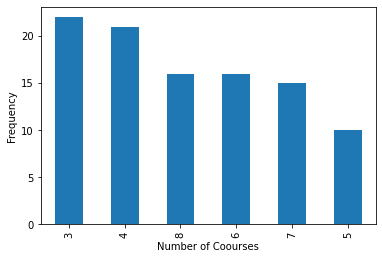

In [19]:
number_courses = pd.DataFrame(
    data={
        "number_of_courses": student_marks_df["number_courses"].value_counts().index,
        "freq": student_marks_df["number_courses"].value_counts().values
    }
)

number_courses.plot(
    kind="bar",
    x="number_of_courses",
    y="freq",
    legend=False,
    xlabel="Number of Coourses",
    ylabel="Frequency"
);

## Time Study

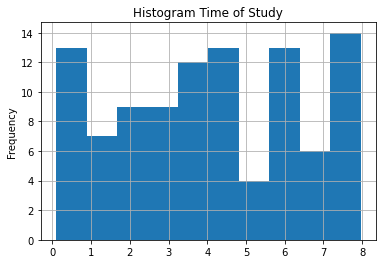

In [20]:
student_marks_df["time_study"].plot(
    kind="hist",
    title="Histogram Time of Study",
    grid=True
);

In [21]:
pd.DataFrame(
    data={
        "time_study": student_marks_df["time_study"].value_counts().index,
        "freq": student_marks_df["time_study"].value_counts().values
    }
).head()

,time_study,freq
0,2.438,1
1,6.063,1
2,1.803,1
3,1.954,1
4,7.451,1


- Rentang waktu belajar di antara 0.096-7.957000000000001 jam per hari.
- Waktu rata-rata dari 100 siswa berbeda-beda
- Waktu belajar terpendek adalah 0.096 jam setiap hari pada mahasisaw id 1.
- Waktu belajar terpanjang adalah 7.957000000000001 jam setiap hari pada mahasiswa id 80.

## Marks

In [22]:
student_marks_df[(student_marks_df["marks"] >= 35) & (student_marks_df["marks"] <= 45)]

,number_courses,time_study,marks
10,3,7.353,42.036
17,8,6.080,38.490
21,6,6.126,35.939
33,6,6.594,39.965
35,3,7.543,43.978
38,7,6.533,41.358
50,6,6.703,40.602
53,7,6.049,36.653
74,4,6.954,39.952
76,5,6.379,36.746


In [23]:
student_marks_df[(student_marks_df["marks"] < 35)].sort_values(by="marks").tail(10)

,number_courses,time_study,marks
19,8,3.977,25.133
27,8,4.378,26.532
48,3,5.635,26.882
66,4,5.473,27.569
23,7,4.875,28.043
6,3,6.063,29.889
16,5,5.719,30.548
9,3,6.173,30.862
58,3,6.198,31.236
99,3,6.335,32.357


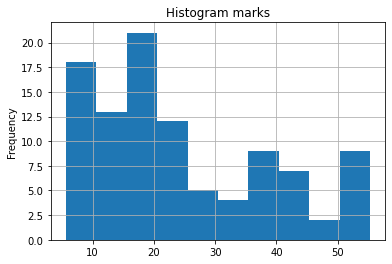

In [24]:
student_marks_df["marks"].plot(
    kind="hist",
    x="marks",
    title="Histogram marks",
    grid=True
);

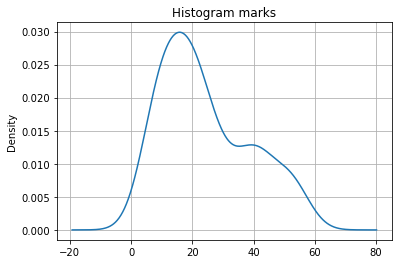

In [25]:
student_marks_df["marks"].plot(
    kind="kde",
    x="marks",
    title="Histogram marks",
    grid=True
);

- Semua nilai dari 100 mahasiswa berbeda-beda.
- Sebaran nilai terdistribusi hampir normal.

# Relation Plot

In [ ]:
student_marks_df[["number_courses", "time_study"]].corrwith(student_marks_df["marks"], method="pearson")

- Korelasi time_study dengan marks sangat tinggi, yaitu +0.942254.
- Korelasi number_courses dengan marks tidak terlalu tinggi, yaitu +0.417335.

In [ ]:
student_marks_df.plot(
    kind="scatter",
    x="number_courses",
    y="marks",
    title="Marks and Number of Courses Relation"
);

In [ ]:
student_marks_df.plot(
    kind="scatter",
    x="time_study",
    y="marks",
    title="Marks and Time of Study Relation"
);

In [ ]:
student_marks_df.plot(
    kind="scatter",
    x="number_courses",
    y="time_study",
    title="Number of Courses and Time Study Relation"
);

# Central of Tendency

In [26]:
student_marks_df.describe()

,number_courses,time_study,marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


# Measure of Variation

## Range

In [27]:
number_courses_range = student_marks_df["number_courses"].max() - student_marks_df["number_courses"].min()
times_study_range = student_marks_df["time_study"].max() - student_marks_df["time_study"].min()
marks_range = student_marks_df["marks"].max() - student_marks_df["marks"].min()

print(f"Number of Courses range : {number_courses_range}")
print(f"Time of Study range     : {times_study_range}")
print(f"Marks range             : {marks_range}")

Number of Courses range : 5
Time of Study range     : 7.861000000000001
Marks range             : 49.69


- Rentang nilai pada kolom `marks` lebih besar dibandingkan kolom lainnya, yaitu sebesar 49.69. Degan kata lain keberagaman atau variasi sebaran data pada kolom marks tinggi.
- 100 mahasiswa memiliki nilai `marks` yang berbeda.

## Variance

In [28]:
student_marks_df.var()

number_courses      3.238283
time_study          5.630722
marks             205.239965
dtype: float64

## Standard Deviation

In [29]:
student_marks_df.std()

number_courses     1.799523
time_study         2.372914
marks             14.326199
dtype: float64

# Empirical Rule

## Q1

In [30]:
student_marks_df.quantile(0.25)

number_courses     4.0000
time_study         2.0585
marks             12.6330
Name: 0.25, dtype: float64

## Q2

In [31]:
student_marks_df.quantile(0.5)

number_courses     5.0000
time_study         4.0220
marks             20.0595
Name: 0.5, dtype: float64

## Q3

In [32]:
student_marks_df.quantile(0.75)

number_courses     7.00000
time_study         6.17925
marks             36.67625
Name: 0.75, dtype: float64

# Outlier

In [33]:
# number_of_courses
lower_courses = 4.0000 - 1.5 * (7.00000 - 4.0000)
upper_courses = 7.00000 + 1.5 * (7.00000 - 4.0000)

print(f"Number of Courses")
print(f"lower_courses: {lower_courses}")
print(f"upper_courses: {upper_courses}")

# time_study
lower_time_study = 2.0585 - 1.5 * (6.17925 - 2.0585)
upper_time_study = 6.17925 + 1.5 * (6.17925 - 2.0585)

print(f"\nTime of Study")
print(f"lower_courses: {lower_time_study}")
print(f"upper_courses: {upper_time_study}")

# marks
lower_marks = 12.6330 - 1.5 * (36.67625 - 12.6330)
upper_marks = 36.67625 + 1.5 * (36.67625 - 12.6330)

print(f"\nTime of Study")
print(f"lower_courses: {lower_marks}")
print(f"upper_courses: {upper_marks}")

Number of Courses
lower_courses: -0.5
upper_courses: 11.5

Time of Study
lower_courses: -4.122624999999999
upper_courses: 12.360374999999998

Time of Study
lower_courses: -23.43187500000001
upper_courses: 72.74112500000001


In [34]:
student_marks_df[student_marks_df["number_courses"] <= 11.5].shape

(100, 3)

In [35]:
student_marks_df[student_marks_df["time_study"] <= 12.360374999999998].shape,

((100, 3),)

In [36]:
student_marks_df[student_marks_df["marks"] <= 72.74112500000001].shape

(100, 3)

Tidak ada outlier